In [47]:
import pandas as pd
import numpy as np
data=pd.read_csv('CEPS.csv',encoding='ANSI')
data["a13"]=data["a13"].apply(lambda x: np.NaN if str(x).isspace() else x)
data["a14"]=data["a14"].apply(lambda x: np.NaN if str(x).isspace() else x)
sample=data.sample(1000)
sample['a13']=sample['a13'].astype('float')
sample['a14']=sample['a14'].astype('float')
mean_height=np.mean(sample.a13)
mean_weight=np.mean(sample.a14)
print("身高的均值",mean_height)
print("体重的均值",mean_weight)

身高的均值 161.2902564102564
体重的均值 99.51348435814455


e:\python\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[161.74276859504133, 161.7934224049332, 162.04347826086956, 161.80041152263374, 161.44272445820434, 161.5695159629248, 161.76652892561984, 161.6174358974359, 161.47058823529412, 161.51738241308794, 161.74233128834356, 161.87847579814624, 161.61184882533198, 161.31770833333334, 161.82523267838675, 161.75, 161.75338189386056, 161.25622406639005, 161.4725956566701, 161.4602851323829, 162.030959752322, 160.96177685950414, 161.88509316770185, 161.7741935483871, 161.429012345679, 160.8298969072165, 161.53305785123968, 161.85669781931463, 161.67827868852459, 161.77263374485597]


e:\python\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


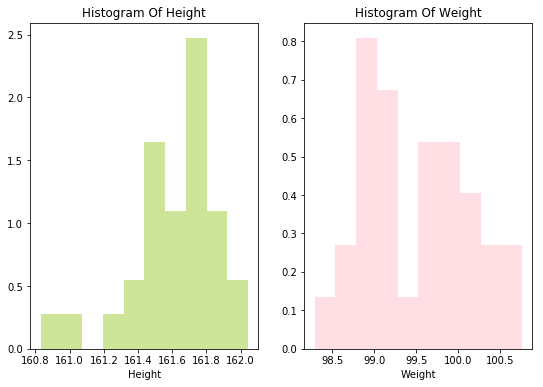

In [3]:
import matplotlib.pyplot as plt
mean_height=[]
mean_weight=[]
for i in range(1,31):
    sample=data.sample(1000)
    sample['a13']=sample['a13'].astype('float')
    sample['a14']=sample['a14'].astype('float')
    mean_height.append(np.mean(sample.a13))
    mean_weight.append(np.mean(sample.a14))
print(mean_height)
fig,(fig_height,fig_weight) = plt.subplots(ncols=2,figsize=(9,6))

fig_height.hist(mean_height,10,normed=1,facecolor='yellowgreen',alpha=0.5)
fig_height.set_title('Histogram Of Height')
fig_height.set_xlabel("Height")

fig_weight.hist(mean_weight,10,normed=1,facecolor='pink',alpha=0.5)
fig_weight.set_title("Histogram Of Weight")
fig_weight.set_xlabel("Weight")

fig.subplots_adjust(hspace=0.1)
plt.show()







In [121]:
mean_mean_height=np.mean(mean_height)
mean_mean_weight=np.mean(mean_weight)
print('平均身高的均值:',mean_mean_height)#均值的均值
print('平均体重的均值:',mean_mean_weight)#均值的均值
SE_mean_height=np.var(mean_height)**0.5
SE_mean_weight=np.var(mean_weight)**0.5
print('平均身高的标准误:',SE_mean_height)#标准误
print('平均体重的标准误:',SE_mean_weight)#标准误

平均身高的均值: 161.57323243729508
平均体重的均值: 99.5042558053652
平均身高的标准误: 0.2626290582502966
平均体重的标准误: 0.8761715101249876


In [119]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf
sample1=data.drop(data[data.b18b==' '].index)
sample1=sample1.drop(sample1[sample1.b18a==' '].index)
sample1=sample1.drop(sample1[sample1.a14==' '].index)
sample1=sample1.drop(sample1[sample1.b09==' '].index)
sample1=sample1.drop(sample1[sample1.b14a1==' '].index)
sample1=sample1.drop(sample1[sample1.b14a2==' '].index)
sample1=sample1.drop(sample1[sample1.b14b1==' '].index)
sample1=sample1.drop(sample1[sample1.b14b2==' '].index)
sample1['b18a']=sample1['b18a'].astype('float')#
sample1['b18b']=sample1['b18b'].astype('float')#
sample1['a14']=sample1['a14'].astype('float')#y
sample1['b09']=sample1['b09'].astype('float')
sample1['b14a1']=sample1['b14a1'].astype('float')
sample1['b14a2']=sample1['b14a2'].astype('float')
sample1['b14b1']=sample1['b14b1'].astype('float')
sample1['b14b2']=sample1['b14b2'].astype('float')
sample1=sample1[sample1.a14.isna().values==False]

y=sample1['a14']
x1=sample1['b09']
x2=((sample1['b14a1']*60+sample1["b14a2"])*5+(sample1['b14b1']*60+sample1["b14b2"])*2)/7
x3=sample1["b18a"]*60+sample1["b18b"]
X_data=pd.DataFrame({'x1':x1,
                    'x2':x2,
                    'x3':x3})
Y_data=pd.DataFrame({'y':y})
model = sm.OLS(Y_data, X_data) 
results = model.fit()

为探究七年级学生体重的影响因素，直观上我们认为： 家庭经济条件、每天学习时间（以每周写学校老师布置的作为为例）与每天晚上睡眠时间是影响七年级学生体重的重要因素。我们可以认为：家庭经济条件越好的同学，每天的营养摄入更加充分，则体重会相对较重。每周学习时间越长，学生会日益消瘦，则体重较轻。每天晚上睡眠时间越少，人过于疲劳，也会日益消瘦。

我们取:  
体重作为被解释变量 Y  
家庭经济条件作为分类变量 X1：其中1~5代表家庭经济条件从低到高五个等级  
每天学习时间 X2：其中X2=每周学习时间/7  
每天晚上睡眠时间X3  
X2和X3以分钟为单位  
进行多元线性回归

In [122]:
print("参数估计:\n",results.params)

参数估计:
 x1    20.598307
x2     0.024997
x3     0.067610
dtype: float64


In [118]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 7.775e+04
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:02:18   Log-Likelihood:                -75073.
No. Observations:               16057   AIC:                         1.502e+05
Df Residuals:                   16054   BIC:                         1.502e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            20.5983      0.261     78.995      0.0

模型的显著性：  
根据F统计量 其中P值<0.01  
在99%的把握下模型显著  
变量系数：  
b1_hat=20.5983  
b2_hat=0.0250  
b3_hat=0.0676  
其中X1、X2、X3的系数的P值均小于0.01,我们说X1、X2、X3的系数在99%的置信水平下 显著  

模型解释：  
X1为分类变量，代表着家庭经济条件，即家庭经济条件每提升一个水平（如从非常困难-比较困难），则七年级学生的平均体重提高20.5983斤  
X2代表每天学习的平均时间，即每天的学习时间每增加1分钟，七年级学生的平均体重提高0.025斤  
X3代表每天晚上睡眠时间，即每晚睡眠时间每增加一分钟，七年级学生的平均体重提高0.0676斤

其中R方=0.936,说明学生体重的变化由X1 X2 X3三个变量解释了93.6%，拟合效果非常好